In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.util import ngrams
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import hstack

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Saad\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to

True

In [3]:
# Load Dataset
df = pd.read_csv(r'C:\Users\Saad\OneDrive - Bahrain Polytechnic\NLP\Project\IEEE Research Papers Dataset\database.csv')

In [4]:
# Basic Dataset Information before cleaning
print("="*50)
print("DATASET INFORMATION BEFORE CLEANING")
print("="*50)
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

DATASET INFORMATION BEFORE CLEANING
Dataset Shape: (601, 8)

Columns: ['Unnamed: 0', 'Id', 'title', 'link', 'year', 'authors', 'citations', 'abstract']

Missing Values Before Cleaning:
Unnamed: 0     0
Id             0
title          0
link           0
year           0
authors        0
citations      0
abstract      50
dtype: int64


In [5]:
# Data Cleaning
def clean_data(df):
    """Data cleaning function"""
    # Remove rows with null values
    df_cleaned = df.dropna()
    # Reset index after dropping rows
    df_cleaned = df_cleaned.reset_index(drop=True)
    # Combine title and abstract
    df_cleaned['combined_text'] = df_cleaned['title'] + " " + df_cleaned['abstract']
    return df_cleaned

In [6]:
# Apply data cleaning
df_clean = clean_data(df)

In [7]:
# Print information after cleaning
print("\n" + "="*50)
print("DATASET INFORMATION AFTER CLEANING")
print("="*50)
print("Dataset Shape:", df_clean.shape)
print("\nMissing Values After Cleaning:")
print(df_clean.isnull().sum())


DATASET INFORMATION AFTER CLEANING
Dataset Shape: (551, 9)

Missing Values After Cleaning:
Unnamed: 0       0
Id               0
title            0
link             0
year             0
authors          0
citations        0
abstract         0
combined_text    0
dtype: int64


In [8]:
# Text Preprocessing Function
def preprocess_text(text):
    """Text preprocessing function"""
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return {
        'original_tokens': tokens,
        'stemmed_tokens': stemmed_tokens,
        'lemmatized_tokens': lemmatized_tokens
    }


In [9]:
def print_preprocessing_example(text):
    preprocessed = preprocess_text(text)
    
    print("Text Preprocessing Example:")
    print("\nOriginal Text:", text)
    
    print("\n1. Tokenization & Stopword Removal:")
    print(preprocessed['original_tokens'])
    
    print("\n2. Stemming:")
    print(preprocessed['stemmed_tokens'])
    
    print("\n3. Lemmatization:")
    print(preprocessed['lemmatized_tokens'])

# Example with a sample text
example_text = "The researchers are developing improved machine learning algorithms for better results"
print_preprocessing_example(example_text)

Text Preprocessing Example:

Original Text: The researchers are developing improved machine learning algorithms for better results

1. Tokenization & Stopword Removal:
['researchers', 'developing', 'improved', 'machine', 'learning', 'algorithms', 'better', 'results']

2. Stemming:
['research', 'develop', 'improv', 'machin', 'learn', 'algorithm', 'better', 'result']

3. Lemmatization:
['researcher', 'developing', 'improved', 'machine', 'learning', 'algorithm', 'better', 'result']


In [10]:
# Text Representation Function
def represent_text(tokens):
    """Text representation function"""
    # POS Tagging
    pos_tags = pos_tag(tokens)
    
    # Named Entity Recognition
    ner_tags = ne_chunk(pos_tags)
    
    # Generate N-grams
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))
    
    return {
        'pos_tags': pos_tags,
        'ner_tags': ner_tags,
        'bigrams': bigrams,
        'trigrams': trigrams
    }

In [11]:
def print_text_representation_example(text):
    tokens = word_tokenize(text.lower())
    representation = represent_text(tokens)
    
    print("Text Representation Example:")
    print("\nPOS Tags (first 5):")
    print(representation['pos_tags'][:5])
    
    print("\nNamed Entities:")
    print(representation['ner_tags'])
    
    print("\nBigrams (first 5):")
    print(representation['bigrams'][:5])
    
    print("\nTrigrams (first 5):")
    print(representation['trigrams'][:5])

# Example with a sample text
example_text = "Deep learning techniques improve natural language processing tasks significantly."
print_text_representation_example(example_text)

Text Representation Example:

POS Tags (first 5):
[('deep', 'JJ'), ('learning', 'NN'), ('techniques', 'NNS'), ('improve', 'VB'), ('natural', 'JJ')]

Named Entities:
(S
  deep/JJ
  learning/NN
  techniques/NNS
  improve/VB
  natural/JJ
  language/NN
  processing/NN
  tasks/NNS
  significantly/RB
  ./.)

Bigrams (first 5):
[('deep', 'learning'), ('learning', 'techniques'), ('techniques', 'improve'), ('improve', 'natural'), ('natural', 'language')]

Trigrams (first 5):
[('deep', 'learning', 'techniques'), ('learning', 'techniques', 'improve'), ('techniques', 'improve', 'natural'), ('improve', 'natural', 'language'), ('natural', 'language', 'processing')]


In [12]:
# Apply preprocessing and representation
df_clean['preprocessed'] = df_clean['combined_text'].apply(preprocess_text)
df_clean['represented'] = df_clean['preprocessed'].apply(lambda x: represent_text(x['original_tokens']))


In [13]:
# Prepare ML features
def prepare_ml_features(row):
    # Get preprocessed tokens
    tokens = row['preprocessed']['lemmatized_tokens']
    
    # Get POS tags
    pos_tags = [tag for word, tag in row['represented']['pos_tags']]
    
    # Get n-grams
    bigrams = [' '.join(bg) for bg in row['represented']['bigrams']]
    trigrams = [' '.join(tg) for tg in row['represented']['trigrams']]
    
    return {
        'tokens': ' '.join(tokens),
        'pos_tags': ' '.join(pos_tags),
        'ngrams': ' '.join(bigrams + trigrams)
    }

In [14]:
# Categorization function
def categorize_paper(row):
    text = str(row['combined_text']).lower()
    
    security_keywords = ['security', 'encryption', 'cryptography', 'authentication', 'privacy', 
                        'cyber', 'protection', 'attack', 'threat', 'malware', 'firewall', 
                        'vulnerability', 'secure', 'hacking', 'penetration', 'password']
    
    elearning_keywords = ['learning', 'education', 'teaching', 'student', 'classroom', 
                         'training', 'educational', 'pedagogy', 'curriculum', 'school', 
                         'academic', 'teacher', 'learner', 'e-learning', 'mooc', 'course']
    
    ict_keywords = ['network', 'software', 'hardware', 'computer', 'programming', 'database',
                    'algorithm', 'system', 'digital', 'technology', 'communication', 'data',
                    'internet', 'cloud', 'wireless', 'computing', 'application', 'mobile']
    
    if any(keyword in text for keyword in security_keywords):
        return "Information Security"
    elif any(keyword in text for keyword in elearning_keywords):
        return "E-Learning"
    elif any(keyword in text for keyword in ict_keywords):
        return "ICT"
    else:
        return "Other"

In [15]:
# Extract ML features
df_clean['ml_features'] = df_clean.apply(prepare_ml_features, axis=1)
df_clean['category'] = df_clean.apply(categorize_paper, axis=1)

In [16]:
# Create vectorizers for different feature types
token_vectorizer = TfidfVectorizer(max_features=1000)
pos_vectorizer = CountVectorizer(max_features=100)
ngram_vectorizer = TfidfVectorizer(max_features=500)

In [17]:
# Transform features
X_tokens = token_vectorizer.fit_transform(df_clean['ml_features'].apply(lambda x: x['tokens']))
X_pos = pos_vectorizer.fit_transform(df_clean['ml_features'].apply(lambda x: x['pos_tags']))
X_ngrams = ngram_vectorizer.fit_transform(df_clean['ml_features'].apply(lambda x: x['ngrams']))


In [18]:
# Combine features
X = hstack([X_tokens, X_pos, X_ngrams])
y = df_clean['category']

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Train both classifiers
nb_classifier = MultinomialNB()
lr_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

nb_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

c:\Users\Saad\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [21]:
# Make predictions for both models
nb_train_pred = nb_classifier.predict(X_train)
nb_test_pred = nb_classifier.predict(X_test)
lr_train_pred = lr_classifier.predict(X_train)
lr_test_pred = lr_classifier.predict(X_test)

In [22]:
# Calculate accuracies
nb_train_acc = accuracy_score(y_train, nb_train_pred)
nb_test_acc = accuracy_score(y_test, nb_test_pred)
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)

In [23]:
# Print results for both models
print("\nModel Performance Comparison:")
print("="*50)
print("\nNaive Bayes Performance:")
print("Training Accuracy:", round(nb_train_acc, 3))
print("Testing Accuracy:", round(nb_test_acc, 3))
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, nb_test_pred))

print("\nLogistic Regression Performance:")
print("Training Accuracy:", round(lr_train_acc, 3))
print("Testing Accuracy:", round(lr_test_acc, 3))
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, lr_test_pred))


Model Performance Comparison:

Naive Bayes Performance:
Training Accuracy: 0.641
Testing Accuracy: 0.559

Classification Report (Naive Bayes):
                      precision    recall  f1-score   support

          E-Learning       0.48      0.42      0.45        26
                 ICT       0.58      0.89      0.70        57
Information Security       0.00      0.00      0.00        21
               Other       0.00      0.00      0.00         7

            accuracy                           0.56       111
           macro avg       0.26      0.33      0.29       111
        weighted avg       0.41      0.56      0.47       111


Logistic Regression Performance:
Training Accuracy: 0.934
Testing Accuracy: 0.676

Classification Report (Logistic Regression):
                      precision    recall  f1-score   support

          E-Learning       0.55      0.65      0.60        26
                 ICT       0.70      0.84      0.76        57
Information Security       1.00      0.48

c:\Users\Saad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Saad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Example predictions with both models
print("\nDetailed Example Predictions:")
print("="*50)
for i in range(3):
    print(f"\nDocument {i+1}:")
    print(f"Title: {df_clean['title'].iloc[i]}")
    print(f"Abstract: {df_clean['abstract'].iloc[i][:200]}...")
    
    features = prepare_ml_features(df_clean.iloc[i])
    doc_features = hstack([
        token_vectorizer.transform([features['tokens']]),
        pos_vectorizer.transform([features['pos_tags']]),
        ngram_vectorizer.transform([features['ngrams']])
    ])
    
    nb_prediction = nb_classifier.predict(doc_features)[0]
    lr_prediction = lr_classifier.predict(doc_features)[0]
    
    print("\nKey features:")
    print(f"Top tokens: {', '.join(features['tokens'].split()[:5])}")
    print(f"Top POS tags: {', '.join(features['pos_tags'].split()[:5])}")
    print(f"Top n-grams: {', '.join(features['ngrams'].split()[:3])}")
    
    print(f"\nNaive Bayes Prediction: {nb_prediction}")
    print(f"Logistic Regression Prediction: {lr_prediction}")
    print(f"Actual Category: {df_clean['category'].iloc[i]}")
    print("-"*50)


Detailed Example Predictions:

Document 1:
Title: Bargaining Game Based Time Scheduling Scheme for Ambient Backscatter Communications
Abstract: Backscatter communications have been acknowledged as an essential key technology in the Internet of Things (IoT) applications. Considering the fact that it needs the coordination from network agents, ...

Key features:
Top tokens: bargaining, game, based, time, scheduling
Top POS tags: VBG, NN, VBN, NN, VBG
Top n-grams: bargaining, game, game

Naive Bayes Prediction: ICT
Logistic Regression Prediction: ICT
Actual Category: ICT
--------------------------------------------------

Document 2:
Title: The Use of Tangible User Interfaces in K12 Education Settings: A Systematic Mapping Study
Abstract: Tangible User Interfaces have enriched and expanded the user experience when interacting with computers and smart devices. The monopoly of graphical user interfaces has been broken thanks to the emerg...

Key features:
Top tokens: use, tangible, user, i

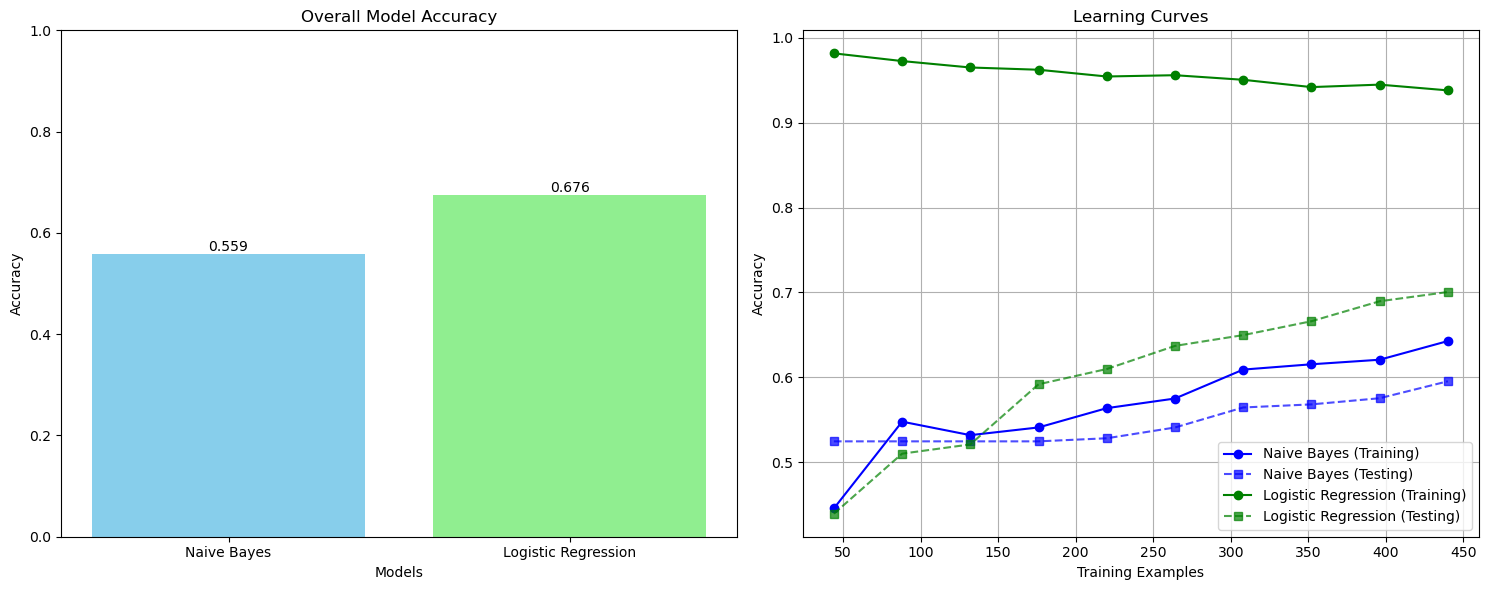

In [29]:
def plot_model_comparisons():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Overall Accuracy
    models = ['Naive Bayes', 'Logistic Regression']
    overall_accuracy_nb = accuracy_score(y_test, nb_test_pred)
    overall_accuracy_lr = accuracy_score(y_test, lr_test_pred)
    accuracies = [overall_accuracy_nb, overall_accuracy_lr]
    
    ax1.bar(models, accuracies, color=['skyblue', 'lightgreen'])
    for i, acc in enumerate(accuracies):
        ax1.text(i, acc, f'{acc:.3f}', ha='center', va='bottom')
    
    ax1.set_title('Overall Model Accuracy')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Accuracy')
    ax1.set_ylim(0, 1.0)

    # Plot 2: Learning Curves
    from sklearn.model_selection import learning_curve
    
    def plot_learning_curve(estimator, title, X, y, ax, color):
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=5, n_jobs=-1, 
            train_sizes=np.linspace(0.1, 1.0, 10))
        
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        
        ax.plot(train_sizes, train_mean, 'o-', color=color, label=f'{title} (Training)')
        ax.plot(train_sizes, test_mean, 's--', color=color, alpha=0.7, label=f'{title} (Testing)')
    
    plot_learning_curve(nb_classifier, 'Naive Bayes', X, y, ax2, 'blue')
    plot_learning_curve(lr_classifier, 'Logistic Regression', X, y, ax2, 'green')
    
    ax2.set_title('Learning Curves')
    ax2.set_xlabel('Training Examples')
    ax2.set_ylabel('Accuracy')
    ax2.legend(loc='lower right')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_model_comparisons()